In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from tracking import run_tracker, evaluate_tracking, load_mot_detections, get_image_frames
from byte.byte_tracker import BYTETracker
from IOU_Tracker import IOUTracker

## 1) Data distribution and visualizations

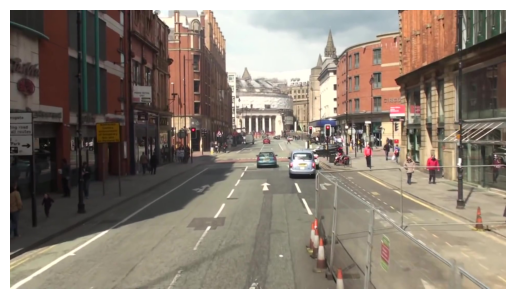

In [2]:
video1_frame1 = "train/MOT17-13-SDP/img1/000001.jpg"
img = cv2.imread(video1_frame1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

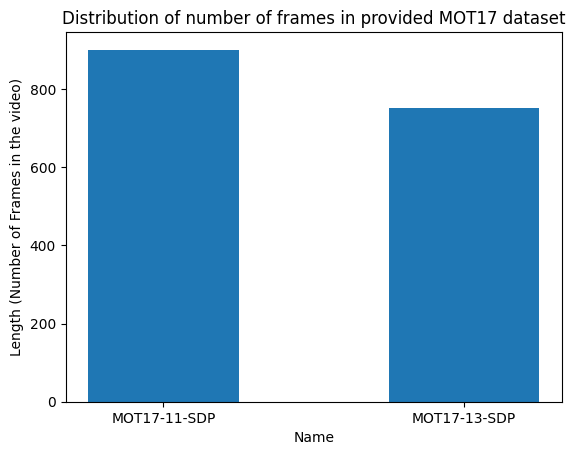

In [3]:
path = 'train'
video_names = sorted(os.listdir(path))
frame_counts = []
for vid in video_names:
    frames_path = os.path.join(path, vid, 'img1')
    frame_counts.append(len(os.listdir(frames_path)))

plt.bar(video_names, frame_counts, width=0.5)
plt.xlabel("Name")
plt.ylabel("Length (Number of Frames in the video)")
plt.title("Distribution of number of frames in provided MOT17 dataset")
plt.show()

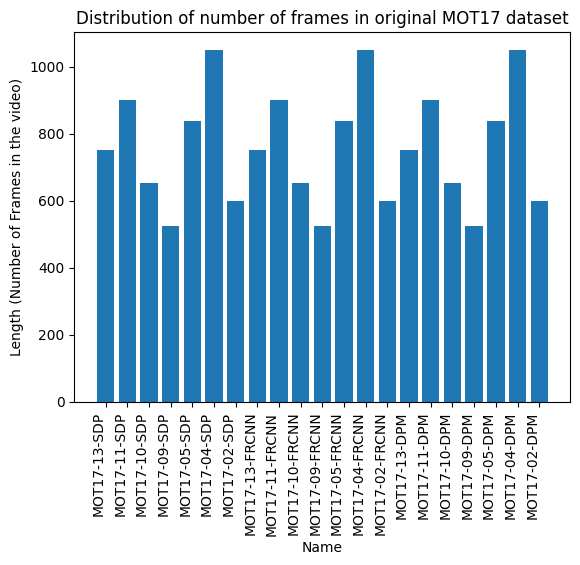

In [4]:
video_names = ['MOT17-13-SDP','MOT17-11-SDP','MOT17-10-SDP','MOT17-09-SDP','MOT17-05-SDP','MOT17-04-SDP','MOT17-02-SDP',
    'MOT17-13-FRCNN','MOT17-11-FRCNN','MOT17-10-FRCNN','MOT17-09-FRCNN','MOT17-05-FRCNN','MOT17-04-FRCNN','MOT17-02-FRCNN',
    'MOT17-13-DPM','MOT17-11-DPM','MOT17-10-DPM','MOT17-09-DPM','MOT17-05-DPM','MOT17-04-DPM','MOT17-02-DPM']
frame_counts = [750,900,654,525,837,1050,600,750,900,654,525,837,1050,600,750,900,654,525,837,1050,600]

plt.bar(video_names, frame_counts)
plt.xlabel("Name")
plt.ylabel("Length (Number of Frames in the video)")
plt.xticks(rotation=90, ha='right')
plt.title("Distribution of number of frames in original MOT17 dataset")
plt.show()

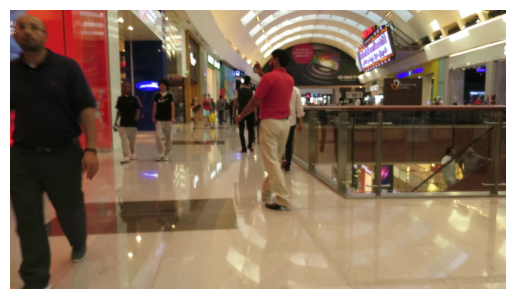

In [5]:
video1_frame1 = "train/MOT17-11-SDP/img1/000001.jpg"
img = cv2.imread(video1_frame1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

## 2) ByteTrack output visualization

In [2]:
det_path = "train/MOT17-11-SDP/det/det.txt"
gt_path = "train/MOT17-11-SDP/gt/gt.txt"
img_path = "train/MOT17-11-SDP/img1/"

In [8]:
byte_tracker = BYTETracker()
frames = get_image_frames(img_path)
detections = load_mot_detections(det_path)
tracked_objects = run_tracker(byte_tracker, frames, detections)
evaluate_tracking(gt_path, tracked_objects)

10617
9436
         IDF1   IDP   IDR  Rcll  Prcn GT MT PT ML  FP   FN IDs   FM  MOTA  MOTP IDt IDa IDm
Overall 61.1% 72.1% 53.0% 69.8% 94.9% 75 23 37 15 353 2846  85  194 65.2% 0.141  53  40  15


0.6518604897699565

## 3) IOU Tracker video visualization

In [3]:
iou_tracker = IOUTracker(iou_threshold=0.8)
frames = get_image_frames(img_path)
detections = load_mot_detections(det_path)
tracked_objects = run_tracker(iou_tracker, frames, detections)
evaluate_tracking(gt_path, tracked_objects)

10617
9436
         IDF1   IDP   IDR  Rcll  Prcn GT MT PT ML  FP   FN  IDs   FM  MOTA  MOTP IDt  IDa IDm
Overall 13.2% 15.2% 11.6% 71.3% 93.5% 75 26 36 13 466 2709 2178  243 43.3% 0.148   6 2173   1


0.4325241174599809

## Testing script

In [1]:
!python -m pytest test_tracking.py

============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0
rootdir: /home/gpu1/himanshu/workspace/Tracking
collected 4 items                                                              

test_tracking.py ....                                                    [100%]

======================== 4 passed in 208.01s (0:03:28) =========================
